Pandas is a module for fast and efficient data analysis tools in Python.
<p>
    - Pandas Series is a single column of data.
    <br>
    - Pandas DataFrame is a several columns of data.

In [1]:
import pandas as pd
import s3fs 

In [2]:
# Series
s = pd.Series(np.random.randn(4), name='daily returns')
s*100
np.abs(s)
s.describe()
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s['AMZN']
'AAPL' in s

True

In [4]:
s['AMZN']

0.7334516116701003

In [3]:
s

AMZN    0.733452
AAPL   -1.290374
MSFT    0.703090
GOOG   -1.701043
Name: daily returns, dtype: float64

In [13]:
x ={'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [14]:
pd.DataFrame.from_dict(x)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [15]:
# DataFrames
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)
df #display dataframe
df.head() #display 1st 5 rows
df.tail() #display last 5 rows
df.iloc[2:5, 0:4] #select rows and columns using their integer indexes
df.loc[df.index[2:5], ['country', 'tcgdp']] # select rows and columns using mixture of indexes and labels


df[['country', 'tcgdp']] #select certain columns from the dataframe
df2 = df[['country', 'POP', 'tcgdp']] # create new dataframe from the selected columns

df2 = df2.rename(index = str, columns={'POP': 'population','tcgdp': 'total GDP'}) # rename columns

df2['population'] = df2['population'] * 1e3 # column multiplication
df2['GDP percap'] = df2['total GDP'] * 1e6 / df2['population']
df2 = df2.set_index('country') #set a column for an index



In [26]:
df2 = df2.set_index('country') #set a column for an index


In [27]:
df2

,population,total GDP,GDP percap
country,,,
Argentina,37335.653,2.950722e+05,7.903229e+06
Australia,19053.186,5.418047e+05,2.843643e+07
India,1006300.297,1.728144e+06,1.717325e+06
Israel,6114.570,1.292539e+05,2.113867e+07
Malawi,11801.505,5.026222e+03,4.258967e+05
South Africa,45064.098,2.272424e+05,5.042648e+06
United States,282171.957,9.898700e+06,3.508038e+07
Uruguay,3219.793,2.525596e+04,7.843971e+06


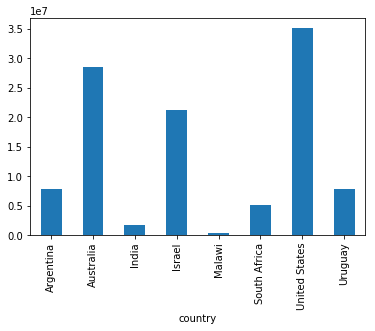

In [28]:
# plot GDP percap
import matplotlib.pyplot as plt
%matplotlib inline

df2['GDP percap'].plot(kind='bar')
plt.show()

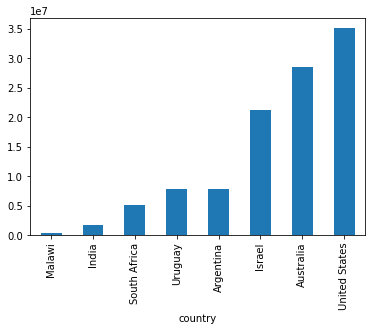

In [29]:
df2 = df2.sort_values(by='GDP percap', ascending=True)
df2['GDP percap'].plot(kind='bar')
plt.show()

In [ ]:
# Use pandas to read, write files
import pandas as pd
pd.read_csv("csv_path_here")
pd.read_excel("excel-path-here")

# Write pandas dataframe to file
df = pd.DataFrame()
df.to_csv("csv-path-here", index=False)

In [33]:
# Read file on S3 storage and load it as Pandas dataframe
import s3fs
fs = s3fs.S3FileSystem(anon=True)
fs.ls('datacases/datathon-2018-2/')
fs.ls('datacases/datathon-2018-2/kaufland')
with fs.open('datacases/datathon-2018-2/kaufland/20180820_Kaufland_case_IoT_and_predictive_maintenance_events.xlsx', 'rb') as f:
    df_events = pd.read_excel(f)

ImportError: Install xlrd >= 1.0.0 for Excel support

In [34]:
fs.ls('datacases/')

['datacases/datathon-2018-1',
 'datacases/datathon-2018-2',
 'datacases/propaganda-datathon']

In [32]:
fs.ls('datacases/datathon-2018-2/')

['datacases/datathon-2018-2/kaufland',
 'datacases/datathon-2018-2/nsi',
 'datacases/datathon-2018-2/ontotext',
 'datacases/datathon-2018-2/telelink',
 'datacases/datathon-2018-2/telenor']

References: <p>
    https://pandas.pydata.org/
    <br>
    http://www.numpy.org/
    <br>
https://quantecon.org
    <br>
https://matplotlib.org/gallery.html
    <br>
http://scipy-lectures.org/intro/matplotlib/matplotlib.html
    <br>
    https://www.scipy.org/
    